# UTP PPM 2024
---------------
# KNN

Tuliskan Nama, NIM, dan kelas Anda:

Nama  : Rayhan Egar Sadtya Nugraha

NIM   : 225150201111014

Kelas : PPM-D

# Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dataset

Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

Link alternatif: https://drive.google.com/file/d/1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV/view

In [20]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fg-FAxEP4XtlJJeyj_ktExBhFV0ulIQV' -O winequality-red.csv

'https://docs.google.com/uc?export=download: Scheme missing.
'id' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
data = pd.read_csv('winequality-red.csv')
data.head(5)
# data['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Data information and check for missing values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu dilakukan imputasi atau metode penanganan nilai yang hilang lainnya.

# Pre-proses Data

Lakukan reduksi data melalui downsampling untuk memperpendek proses pelatihan dan pengujian model.

In [17]:
# Reduce the number data
def random_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=0)
reduced_data = random_sampling(data, 500)
reduced_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


Lakukan normalisasi data kecuali kolom quality sebagai kolom label dengan menggunakan z-score.

In [15]:
# Z-score normalization except for the quality column
def z_score(data):
    # Exclude the 'quality' column from normalization
    columns_to_normalize = data.columns[:-1]
    # Normalized data initialization
    normalized_data = data.copy()
    normalized_data[columns_to_normalize] = (normalized_data[columns_to_normalize] - np.mean(normalized_data[columns_to_normalize]))/np.std(normalized_data[columns_to_normalize])
    return normalized_data

normalized_data = z_score(reduced_data)
normalized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,1.703312,-45.434782,-38.495702,-4.862152,-190.717920,1.986334,1.958937,-3671.643472,-30.476373,-45.403118,2.749813,6
1032,0.132159,-43.286678,-40.719725,-3.177674,-192.599869,-0.298347,0.206489,-3671.461885,-29.245106,-46.871258,1.622499,5
1002,0.714067,-46.539521,-39.012916,-4.904264,-193.392269,0.532446,0.644601,-3673.267080,-29.893142,-44.892460,3.595299,7
487,1.354167,-44.360730,-38.857752,-5.114823,-193.639894,-0.298347,0.206489,-3671.643472,-30.476373,-47.573412,1.998270,6
979,2.517984,-45.557531,-38.185373,-5.451719,-193.095119,-0.506045,-0.063118,-3672.337778,-30.735588,-46.232936,2.374042,5


# Model

Buatlah sebuah fungsi perhitungan jarak menggunakan rumus Chebyshev, Euclidean, Manhattan yang memiliki parameter data1 dan data2 dalam bentuk float, dan distance_type dalam bentuk string.

In [20]:
# Distance Function (chebyshev, euclidean, manhattan)

def chebyshev(data1, data2):
    return np.abs(np.array(data1) - np.array(data2)).max()
def euclidean(data1, data2):
    return np.sqrt(np.sum((np.array(data1) - np.array(data2)) ** 2))
def manhattan(data1, data2):
    return np.sum(np.abs(np.array(data1) - np.array(data2)))


def calculate_distance(data1, data2, distance_type):
    if distance_type == 'chebyshev':
        return chebyshev(data1, data2)
    elif distance_type == 'euclidean':
        return euclidean(data1, data2)
    elif distance_type == 'manhattan':
        return manhattan(data1, data2)
    else:
        return None

# Testing
distest_1 = [3, 2, 1]
distest_0 = [0, 0, 0]
types = ["chebyshev", "euclidean", "manhattan"]

for type in types:
    print(f"Test for function {type}")
    res = calculate_distance(distest_1, distest_0, type)
    print(f"Result: {res}")

Test for function chebyshev
Result: 3
Test for function euclidean
Result: 3.7416573867739413
Test for function manhattan
Result: 6


Simpan label dataset yang dinormalisasi ke dalam variabel yang disebut "label".

In [22]:
label = normalized_data[normalized_data.columns[-1]]
label

1109    6
1032    5
1002    7
487     6
979     5
       ..
831     6
1437    5
620     5
465     5
748     6
Name: quality, Length: 500, dtype: int64

Bagi dataset yang dinormalisasi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [26]:
train_data, test_data, train_label, test_label = train_test_split(normalized_data[normalized_data.columns[:-1]], label, stratify=normalized_data['quality'], test_size=0.2, random_state=1)
print(train_data.shape)
print(test_data.shape)
print(train_label.value_counts())
print(test_label.value_counts())

(400, 11)
(100, 11)
quality
5    175
6    170
7     37
4     12
8      4
3      2
Name: count, dtype: int64
quality
5    44
6    42
7     9
4     3
8     1
3     1
Name: count, dtype: int64


Buatlah sebuah fungsi algoritma KNN untuk melakukan prediksi menggunakan parameter train_data, train_label, test_data, k sebagai bilangan bulat, dan distance_type sebagai string.

In [45]:
def knn(train_data, train_label, test_data, k, distance_type):
    distances = np.array([calculate_distance(train_data.iloc[i], test_data, distance_type) for i in range(train_data.shape[0])])
    nearest_indexes = np.argsort(distances)[:k]
    nearest_points = np.array(train_label.iloc[nearest_indexes])
    class_counter = Counter(nearest_points)
    prediction = class_counter.most_common(1)[0][0]
    return prediction

def knn_multi(train_data, train_label, test_data, k, distance_type):
    predictions = []

    for i in range(test_data.shape[0]):
        current_data = test_data.iloc[i]
        current_pred = knn(train_data, train_label, current_data, k, distance_type)
        predictions.append(current_pred)
        
    return predictions

In [46]:
# Test knn()
print("Test data: ", test_data.iloc[0])
for type in types:
    print(f"Predicting using {type} distance")
    pred = knn(train_data, train_label, test_data.iloc[0], 3, type)
    print(f"Predicted class: {pred}")
    print(f"Actual class: {test_label.iloc[0]}")

Test data:  fixed acidity             -0.740704
volatile acidity         -44.759664
citric acid              -40.616282
residual sugar            -4.609480
chlorides               -193.243694
free sulfur dioxide        1.155541
total sulfur dioxide       1.082713
density                -3673.956045
pH                       -29.115499
sulphates                -46.041439
alcohol                    4.440785
Name: 1335, dtype: float64
Predicting using chebyshev distance
Predicted class: 6
Actual class: 6
Predicting using euclidean distance
Predicted class: 6
Actual class: 6
Predicting using manhattan distance
Predicted class: 6
Actual class: 6


In [49]:
# Test knn_multi()
for type in types:
    print(f"Predicting using {type} distance")
    preds = knn_multi(train_data, train_label, test_data[:5], 8, type)
    print("Predictions: ", preds)
    print("Actual classes: ", test_label[:5])

Predicting using chebyshev distance
Predictions:  [6, 5, 5, 6, 5]
Actual classes:  1335    6
412     5
905     5
961     5
728     5
Name: quality, dtype: int64
Predicting using euclidean distance
Predictions:  [6, 5, 5, 6, 6]
Actual classes:  1335    6
412     5
905     5
961     5
728     5
Name: quality, dtype: int64
Predicting using manhattan distance
Predictions:  [6, 5, 5, 6, 6]
Actual classes:  1335    6
412     5
905     5
961     5
728     5
Name: quality, dtype: int64


Temukan nilai k terbaik dengan mengamati hasil akurasi untuk setiap nilai k yang berbeda dan berbagai metode perhitungan jarak yang berbeda.

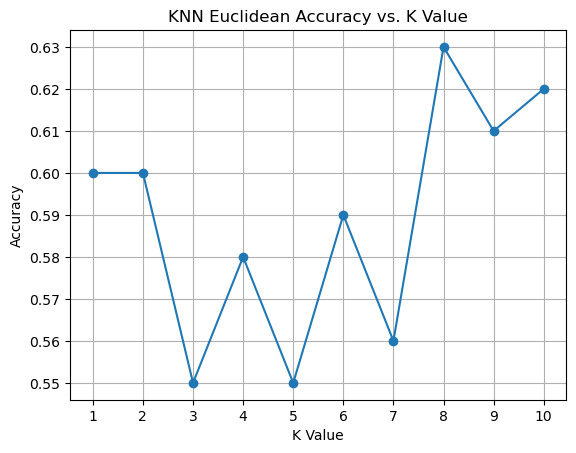

In [48]:
# Find best k for euclidean KNN

# Initialize empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Define a range of k values to test
k_range = range(1, 11) 

# Iterate over each k value
for k in k_range:
    # Make predictions using the KNN model
    predictions = knn_multi(train_data, train_label, test_data, k, 'euclidean')
    # Calculate accuracy
    accuracy = accuracy_score(test_label, predictions)
    # Append k and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Euclidean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

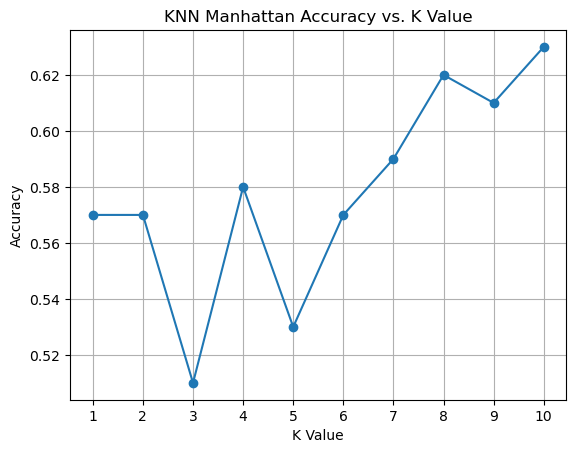

In [50]:
# Find best k for Manhattan KNN
k_values_manhattan = []
accuracies_manhattan = []

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, 'manhattan')
    accuracy = accuracy_score(test_label, predictions)
    k_values_manhattan.append(k)
    accuracies_manhattan.append(accuracy)

plt.plot(k_values_manhattan, accuracies_manhattan, marker='o')
plt.title('KNN Manhattan Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

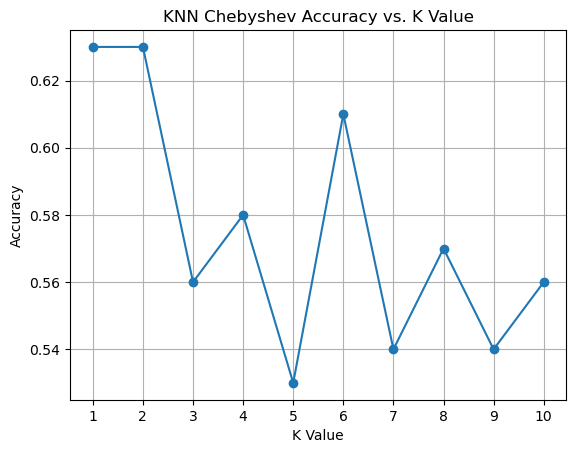

In [51]:
# Find best k for chebyshev KNN
k_values_chebyshev = []
accuracies_chebyshev = []

for k in k_range:
    predictions = knn_multi(train_data, train_label, test_data, k, 'chebyshev')
    accuracy = accuracy_score(test_label, predictions)
    k_values_chebyshev.append(k)
    accuracies_chebyshev.append(accuracy)

plt.plot(k_values_chebyshev, accuracies_chebyshev, marker='o')
plt.title('KNN Chebyshev Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Evaluasi

Cetak hasil akurasi prediksi untuk setiap KNN dengan nilai k terbaik dan rumus perhitungan jarak yang berbeda

In [52]:
# Predict using euclidean KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 8, 'euclidean')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.63


In [54]:
# Predict using manhattan KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 10, 'manhattan')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.63


In [1]:
# Predict using chebyshev KNN with the best k value
predictions = knn_multi(train_data, train_label, test_data, 2, 'chebyshev')
accuracy = accuracy_score(test_label, predictions)
print("Accuracy:", accuracy)

NameError: name 'knn_multi' is not defined

# Kesimpulan

Soal

1. Jelaskan pengaruh k yang rendah ataupun tinggi terhadap akurasi hasil algoritma KNN!
2. Jelaskan pengaruh perbedaan rumus perhitungan jarak yang digunakan terhadap hasil akurasi algoritma KNN!
3. Jelaskan dan sebutkan berapa jumlah k ideal dan apa rumus perhitungan jarak yang menghasilkan akurasi terbaik pada praktikum ini!

Jawaban

1. Pengaruh tinggi-rendah nilai k yang digunakan pada algoritma KNN secara teoretis akan berpengaruh pada robustness dari model yang dihasilkan terhadap noise ataupun outlier sekaligus sifat underfitting/overfitting terhadap training dataset.
- Nilai k yang rendah akan memberikan performa model yang cenderung baik untuk training data, memberikan model yang lebih fleksibel dengan computational resource requirement yang rendah. Akan tetapi, nilai k yang terlalu rendah cenderung untuk mengalami overfit dan sensitif terhadap outlier/noise.
- Nilai k yang tinggi memberikan efek "smoothening" model, menghasilkan model yang lebih robust dengan generalisasi yang mungkin lebih baik. Namun demikian, nilai k ini mampu menghasilkan underfit.
Untuk mendapatkan nilai k terbaik, perlu dilakukan percobaan sesuai dengan case yang ada.
2. Didapatkan dari tiga rumus perhitungan jarak di atas adalah sebagai berikut:
- Rumus dengan pendekatan generalisasi seperti Euclidean dan Manhattan yang menghasilkan nilai tunggal dari beberapa masukan memiliki performa yang baik untuk k > 5.
- Rumus dengan pendekatan yang lebih sederhana seperti Chebyshev cenderung memiliki performa yang lebih baik dengan nilai k yang rendah (k < 5).
3. Pada kasus praktikum kali ini, didapatkan informasi sebagai berikut:
- Nilai k optimal untuk ketiga rumus perhitungan jarak adalah k=8 untuk Euclidean, k=10 untuk Manhattan, dan k=[1, 2] untuk Chebyshev.
- Akurasi optimal ketiga algoritma perhitungan tersebut konsisten: 63%